In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 数値計算のためのライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 表示桁数
%precision 3
# グラフをjupyter Notebook内に表示するための指定
%matplotlib inline

In [3]:
# サンプルデータの作成
weather = [
    "cloudy", "cloudy", 
    "rainy", "rainy", 
    "sunny", "sunny"
]
beer = [6, 8, 2, 4, 10, 12]

# データフレームにまとめる
weather_beer = pd.DataFrame({
    "beer"   : beer, 
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


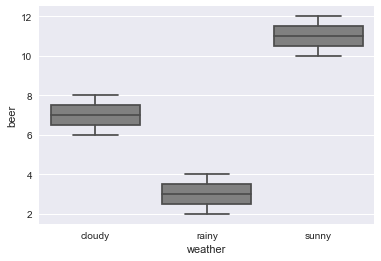

In [4]:
sns.boxplot(x = "weather", y = "beer", 
               data = weather_beer, color = 'gray')

In [5]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


In [6]:
# 天気の持つ影響
effect = [7, 7, 3, 3, 11, 11]

In [7]:
# 群間の平方和
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2)
squares_model

64.000

In [8]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [9]:
# 郡内の平方和
squares_resid = sp.sum(resid ** 2)
squares_resid

6

In [10]:
df_model = 2 # 群間変動の自由度
df_resid = 3 # 群間変動の自由度

In [11]:
# 群間の平均平方（分散）
variance_model = squares_model / df_model
variance_model

32.000

In [12]:
# 群間の平均平方（分散）
variance_resid = squares_resid / df_resid
variance_resid

2.000

In [13]:
f_ratio = variance_model / variance_resid
f_ratio

16.000

In [14]:
1 - sp.stats.f.cdf(x = f_ratio, dfn = df_model, dfd = df_resid)

0.025

In [15]:
anova_model = smf.ols("beer ~ weather", 
                      data = weather_beer).fit()

AssertionError: 

In [16]:
print(sm.stats.anova_lm(anova_model, typ = 2))

NameError: name 'anova_model' is not defined